### Movie Rating Prediction With Python

## Problem Statement

Build a model that predicts the rating of a movie based on genre, director, and actors. You can use regression techniques to tackle this problem.


The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.


Movie rating prediction project enables you to explore data analysis, preprocessing, feature engineering and machine learning modeling techniques.It provides insights into the factors that infulence movie ratings and allows you to build a model that can estimate the ratings of movie accurately.





## Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Adding Data

In [6]:
movies_data=pd.read_csv('/content/drive/MyDrive/Codesoft/Task 2 (Movie Rating Prediction with Python)/Data Sources/movies.dat', sep='::',engine='python',encoding='latin-1',names=['Movieid','Title','Genres'])
movies_data.head()

,Movieid,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
movies_data.shape

(3883, 3)

In [8]:
users_data=pd.read_csv('/content/drive/MyDrive/Codesoft/Task 2 (Movie Rating Prediction with Python)/Data Sources/users.dat', sep='::', engine='python', encoding='latin-1',names=['Userid','Gender','Age','Occupation','Zipcode'])
users_data.head()

,Userid,Gender,Age,Occupation,Zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [9]:
users_data.shape

(6040, 5)

In [10]:
ratings_data=pd.read_csv('/content/drive/MyDrive/Codesoft/Task 2 (Movie Rating Prediction with Python)/Data Sources/ratings.dat', sep='::',engine='python',encoding='latin-1',names=['Userid','Movieid','Ratings','Timestamp'])
ratings_data.head()

,Userid,Movieid,Ratings,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [11]:
ratings_data.shape

(1000209, 4)

In [12]:
# merging movie data with ratings data

ratings_data=movies_data.merge(ratings_data,on='Movieid',how='inner')
ratings_data.head()

,Movieid,Title,Genres,Userid,Ratings,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [13]:
# merging the ratings data with respect to users data and creating new data set

main_data=ratings_data.merge(users_data,on='Userid',how='inner')
main_data.head()

,Movieid,Title,Genres,Userid,Ratings,Timestamp,Gender,Age,Occupation,Zipcode
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


## Pre Processing of Data

In [14]:
main_data.shape

(1000209, 10)

In [15]:
# checking for null values
main_data.isnull().sum()

Movieid       0
Title         0
Genres        0
Userid        0
Ratings       0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zipcode       0
dtype: int64

In [16]:
 # checking the information about the dataset
 main_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Movieid     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   Genres      1000209 non-null  object
 3   Userid      1000209 non-null  int64 
 4   Ratings     1000209 non-null  int64 
 5   Timestamp   1000209 non-null  int64 
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  int64 
 8   Occupation  1000209 non-null  int64 
 9   Zipcode     1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [17]:
main_data['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

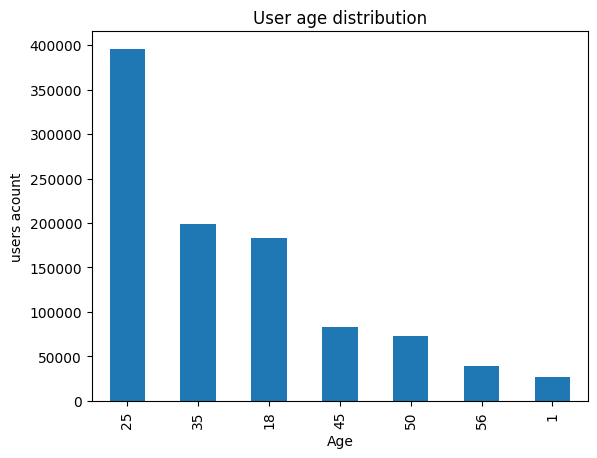

In [18]:
# visual representation

main_data['Age'].value_counts().plot(kind='bar')
plt.title('User age distribution')
plt.xlabel('Age')
plt.ylabel('users acount')
plt.show()

In [19]:
# user ratings for a movies

movie_rating=main_data[main_data['Title'].str.contains('Jumanji')]
movie_rating

,Movieid,Title,Genres,Userid,Ratings,Timestamp,Gender,Age,Occupation,Zipcode
370,2,Jumanji (1995),Adventure|Children's|Fantasy,10,5,979168267,F,35,1,95370
771,2,Jumanji (1995),Adventure|Children's|Fantasy,18,2,978152541,F,18,3,95825
1353,2,Jumanji (1995),Adventure|Children's|Fantasy,23,2,978461604,M,35,0,90049
2779,2,Jumanji (1995),Adventure|Children's|Fantasy,44,4,1004410663,M,45,17,98052
3269,2,Jumanji (1995),Adventure|Children's|Fantasy,48,3,978064964,M,25,4,92107
...,...,...,...,...,...,...,...,...,...,...
630524,2,Jumanji (1995),Adventure|Children's|Fantasy,5956,2,957079525,F,18,4,02142
630817,2,Jumanji (1995),Adventure|Children's|Fantasy,5961,4,957022911,F,45,0,78757
631125,2,Jumanji (1995),Adventure|Children's|Fantasy,6001,3,956805460,F,25,7,94117
631359,2,Jumanji (1995),Adventure|Children's|Fantasy,6019,4,956761170,M,25,0,10024


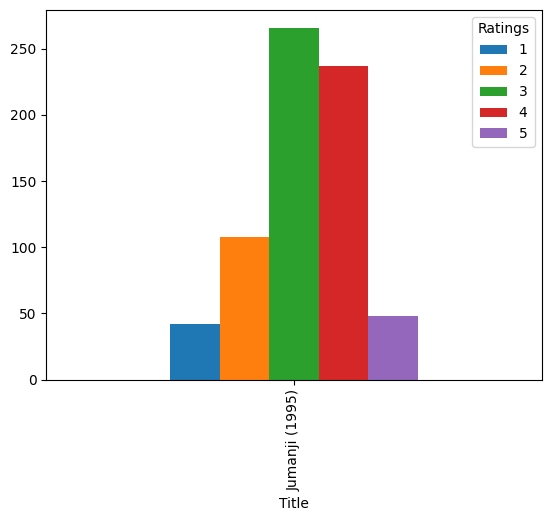

In [20]:
# visual representation

movie_rating.groupby(['Title','Ratings']).size().unstack().plot(kind='bar',stacked=False, legend=True)
plt.show()

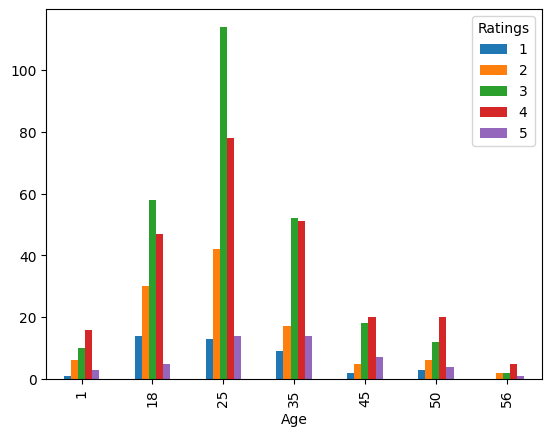

In [21]:
movie_rating.groupby(['Age','Ratings']).size().unstack().plot(kind='bar',stacked=False, legend=True)
plt.show()

In [22]:
main_data.head()

,Movieid,Title,Genres,Userid,Ratings,Timestamp,Gender,Age,Occupation,Zipcode
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [23]:
main_data.to_csv('main_data.csv', index=False)

In [24]:
df=pd.read_csv('main_data.csv')
df.head()

,Movieid,Title,Genres,Userid,Ratings,Timestamp,Gender,Age,Occupation,Zipcode
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [25]:
df.shape

(1000209, 10)

In [26]:
# Splitting the data into features and Targets

X=df.drop(columns=['Title','Genres','Timestamp','Gender','Zipcode','Ratings'],axis=True)

In [27]:
Y=df['Ratings']

In [28]:
print(X)

         Movieid  Userid  Age  Occupation
0              1       1    1          10
1             48       1    1          10
2            150       1    1          10
3            260       1    1          10
4            527       1    1          10
...          ...     ...  ...         ...
1000204     3513    5727   25           4
1000205     3535    5727   25           4
1000206     3536    5727   25           4
1000207     3555    5727   25           4
1000208     3578    5727   25           4

[1000209 rows x 4 columns]


In [29]:
print(Y)

0          5
1          5
2          5
3          4
4          5
          ..
1000204    4
1000205    2
1000206    5
1000207    3
1000208    5
Name: Ratings, Length: 1000209, dtype: int64


In [30]:
# spliting the data into test and training sets

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=2)

In [31]:
print(X.shape,X_train.shape,X_test.shape)

(1000209, 4) (800167, 4) (200042, 4)


### Logistic Regression

In [32]:
model=LogisticRegression()

In [33]:
# Training the model

model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Evaluation

In [34]:
# Accuracy of trainig data
X_train_prediction=model.predict(X_train)

In [35]:
print(X_train_prediction)

[4 4 4 ... 4 4 4]


In [36]:
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)

print('Accuracy on training data :', training_data_accuracy)

Accuracy on training data : 0.348812185456286


In [37]:
# Accuracy on test data
Y_test_prediction=model.predict(X_test)

In [38]:
print(Y_test_prediction)

[4 4 4 ... 4 4 4]


In [42]:
testing_data_accuracy = accuracy_score(Y_test, Y_test_prediction)

print('Accuracy on testing data :', testing_data_accuracy)

Accuracy on testing data : 0.34890672958678676


### Random ForestRegressor model

In [39]:
model_2=RandomForestRegressor(n_estimators=100)
model_2.fit(X_train, Y_train)

RandomForestRegressor()

In [40]:
model_test_prediction=model_2.predict(X_test)

In [41]:
model_2.score(X_train,Y_train)

0.8786739026263632

In [42]:
accuracy_random_forest = round(model_2.score(X_train, Y_train) * 100, 2)

In [43]:
accuracy_random_forest

87.87